In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleansing

In [21]:
url = 'https://docs.google.com/spreadsheets/d/1LKb67DSFJ4yjxZWenWvRyk6kVGUZetcdYdWEM1a-IpA/edit#gid=1485085913'
url_trf = url.replace('/edit#gid=', '/export?format=csv&gid=')
print(url_trf)

df = pd.read_csv(url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1LKb67DSFJ4yjxZWenWvRyk6kVGUZetcdYdWEM1a-IpA/export?format=csv&gid=1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [22]:
df['Release'] = pd.to_datetime(df['Release'])
df = df.drop_duplicates()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# The Oldest and The Newest Games

In [23]:
df[['Name', 'Release']].sort_values('Release').head()

,Name,Release
133,Hydlide,1984-12-01
34,Where in the World Is Carmen Sandiego?,1985-06-01
88,International Karate,1985-11-01
162,Tetris,1988-01-01
22,Last Ninja 2,1988-08-01


In [24]:
df[['Name', 'Release']].sort_values('Release', ascending=False).head()

,Name,Release
20,Valheim,2021-02-01
27,Cyberpunk 2077,2020-12-01
110,Crusader Kings III,2020-09-01
10,Fall Guys,2020-08-01
139,Mordhau,2019-04-01


# Publisher Published most of the games

In [25]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


<Axes: xlabel='Publisher', ylabel='Name'>

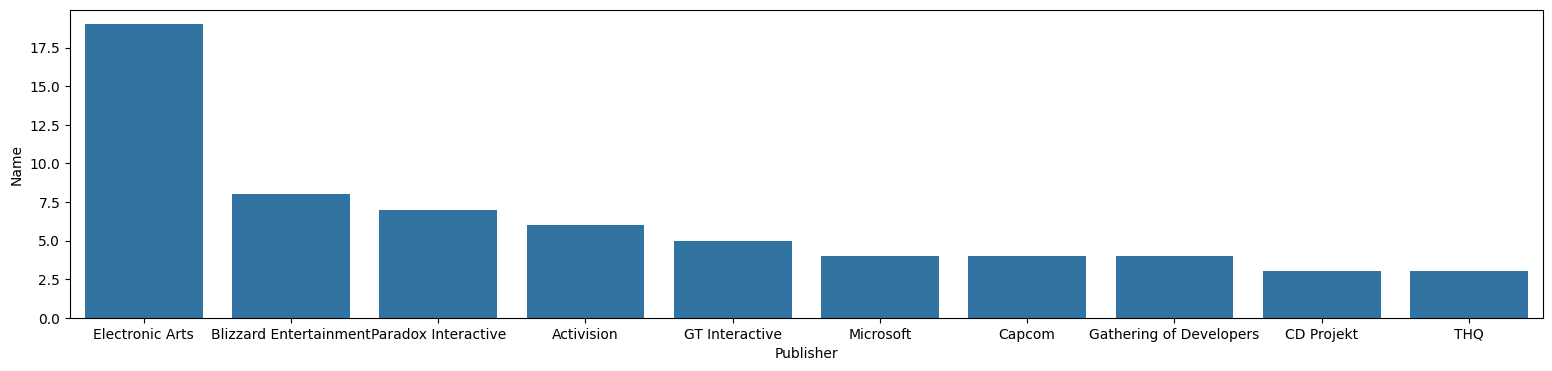

In [42]:
plt.rcParams["figure.figsize"] = (19,4)
sns.barplot(x = 'Publisher',  y= 'Name', data = agg_publisher.sort_values('Name', ascending=False).head(10))

# Delevoper developed most of the games

In [38]:
agg_developer = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_developer.sort_values('Name', ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


<Axes: xlabel='Developer', ylabel='Name'>

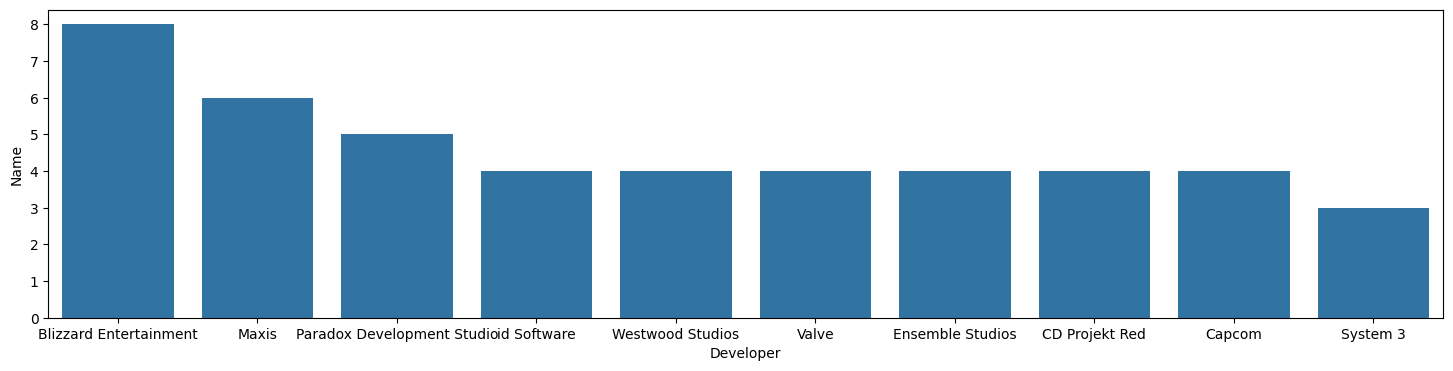

In [39]:
plt.rcParams["figure.figsize"] = (18,4)
sns.barplot(x = 'Developer',  y= 'Name', data = agg_developer.sort_values('Name', ascending=False).head(10))

# Series has the most sales and the most games

In [37]:
agg_series = df.groupby('Series', as_index=False).agg({'Sales':'sum', 'Name':'nunique'})
agg_series.sort_values('Sales', ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


<Axes: xlabel='Series', ylabel='Sales'>

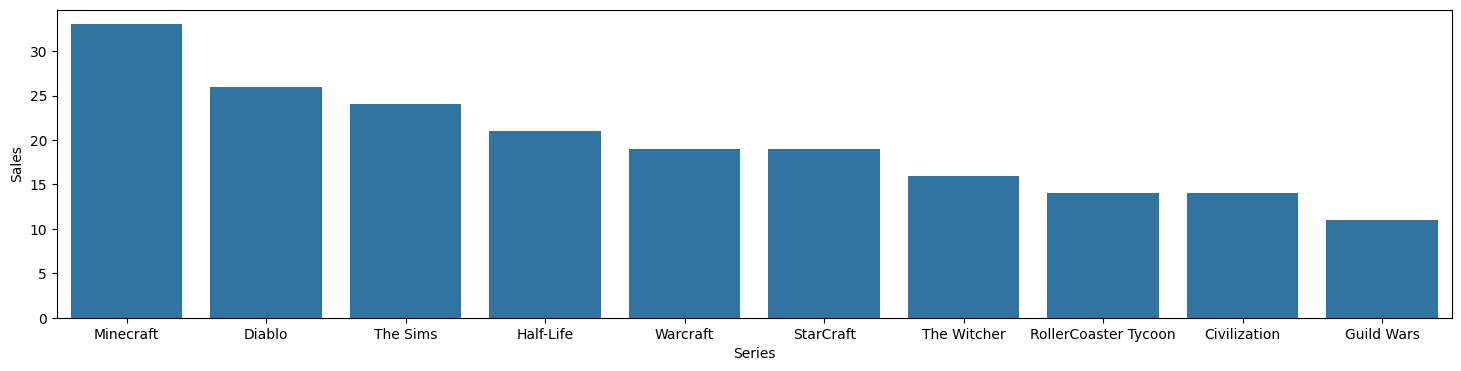

In [40]:
plt.rcParams["figure.figsize"] = (18,4)
sns.barplot(x = 'Series',  y= 'Sales', data = agg_series.sort_values('Sales', ascending=False).head(10))

series with the most sales

<Axes: xlabel='Series', ylabel='Name'>

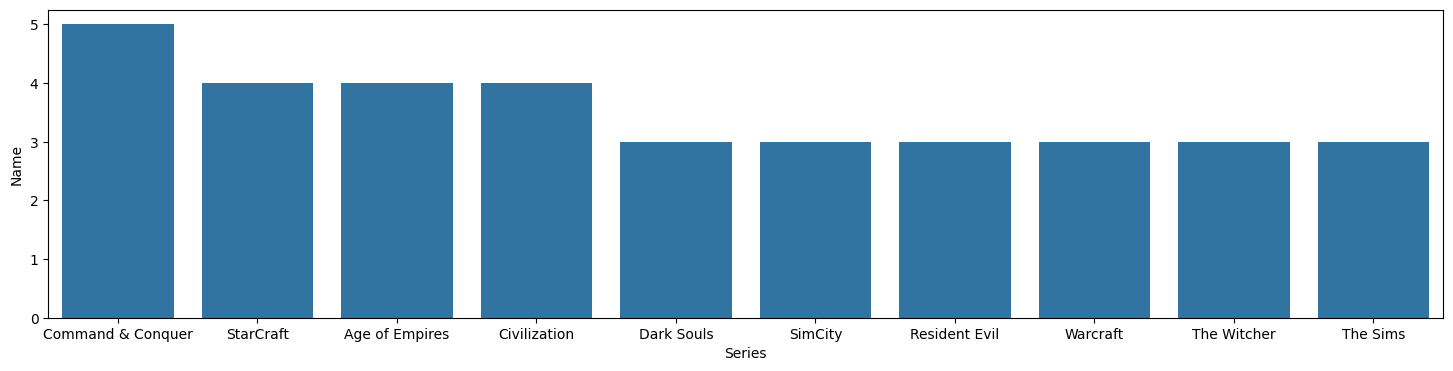

In [41]:
plt.rcParams["figure.figsize"] = (18,4)
sns.barplot(x = 'Series',  y= 'Name', data = agg_series.sort_values('Name', ascending=False).head(10))

series with the most games